NLP Deep Learning(Twitter Data Sentiment analysis)

This notebook explores sentiment analysis of Twitter data using a neural Network. We'll be using a dataset of tweets labeled with sentiment (positive or negative) to train a machine learning model that can predict the sentiment of new tweets. Here's a breakdown of the steps involved:

Data Loading and Exploration: We'll load the Twitter data from a CSV file, then explore it by viewing the first few rows, obtaining summary statistics, and checking for missing values.
Data Visualization: We'll create visualizations to understand the distribution of sentiment classes (positive, negative, etc.) and analyze the most frequent words used in positive and negative tweets using word clouds.

Tweet Length Analysis: We'll explore the distribution of tweet lengths and analyze any relationships between tweet length and sentiment.
Data Preprocessing: We'll handle missing values, remove irrelevant characters and links, and convert text into a format suitable for the machine learning model.
Text Tokenization and Padding: We'll convert text into sequences of numbers using a tokenizer and pad sequences to a fixed length for model training.
Model Training: We'll define and train a Long Short-Term Memory (LSTM) neural network model to classify the sentiment of tweets.
Model Evaluation: We'll evaluate the model's performance on unseen data using metrics like accuracy.

CODE BREAKDOWN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the Twitter data
twitter_data = pd.read_csv('TWEETS.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(twitter_data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First few rows of the dataset:
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_go

In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(twitter_data.describe())


Summary statistics:
           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000  


In [ ]:
# Check for missing values
print("\nMissing values:")
print(twitter_data.isnull().sum())


Missing values:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


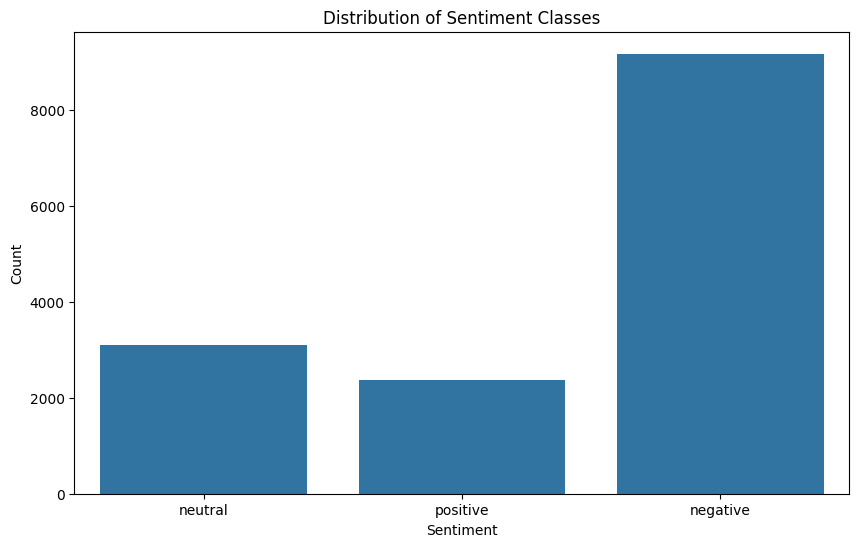

In [ ]:
# Distribution of sentiment classes
plt.figure(figsize=(10, 6))
sns.countplot(x='airline_sentiment', data=twitter_data)
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

Tweet Length Analysis

Explanation:

We import necessary libraries for data manipulation, model building, visualization, and text processing.
We mount Google Drive (optional) to access the data stored there. Replace the file_path with the actual location of your CSV file.
We load the Twitter data using pandas.read_csv.
We print the first few rows to get a glimpse of the data structure.
We use describe to get summary statistics for numerical columns.
We check for missing values using isnull().sum().
We create a countplot using sns.countplot to visualize the distribution of sentiment classes in the data.

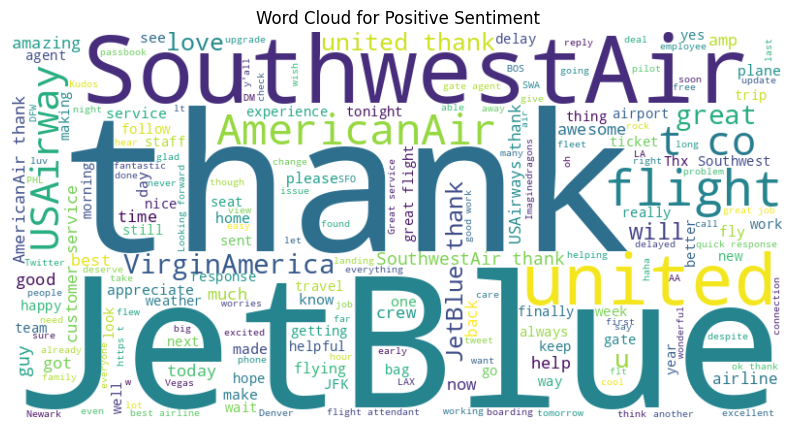

In [ ]:
# Word cloud for positive sentiment
positive_tweets = twitter_data[twitter_data['airline_sentiment'] == 'positive']['text']
positive_text = ' '.join(positive_tweets)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Positive Sentiment")
plt.axis('off')
plt.show()

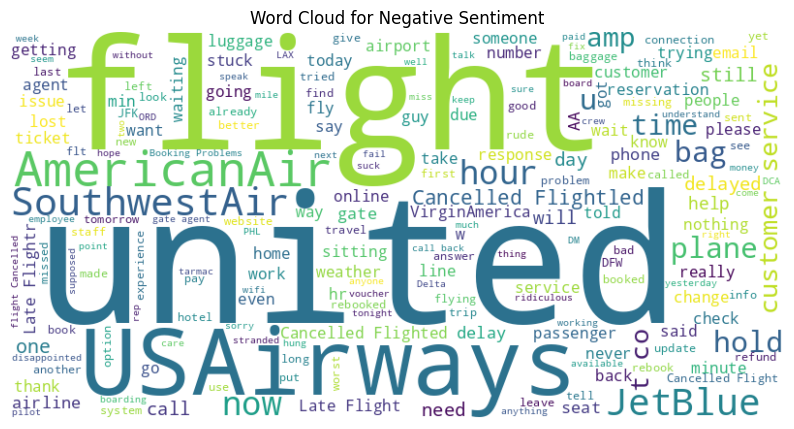

In [ ]:

# Word cloud for negative sentiment
negative_tweets = twitter_data[twitter_data['airline_sentiment'] == 'negative']['text']
negative_text = ' '.join(negative_tweets)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Negative Sentiment")
plt.axis('off')
plt.show()

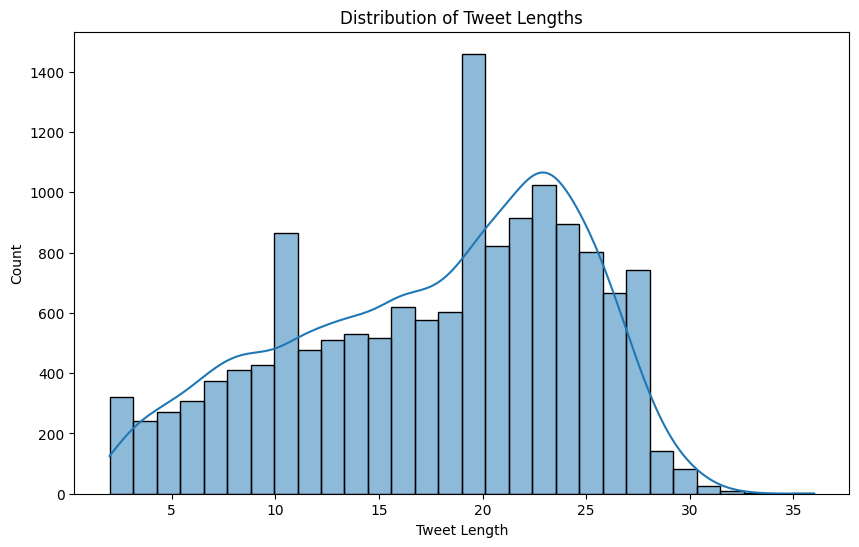

In [ ]:
# Distribution of tweet lengths
twitter_data['tweet_length'] = twitter_data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(twitter_data['tweet_length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Count")
plt.show()

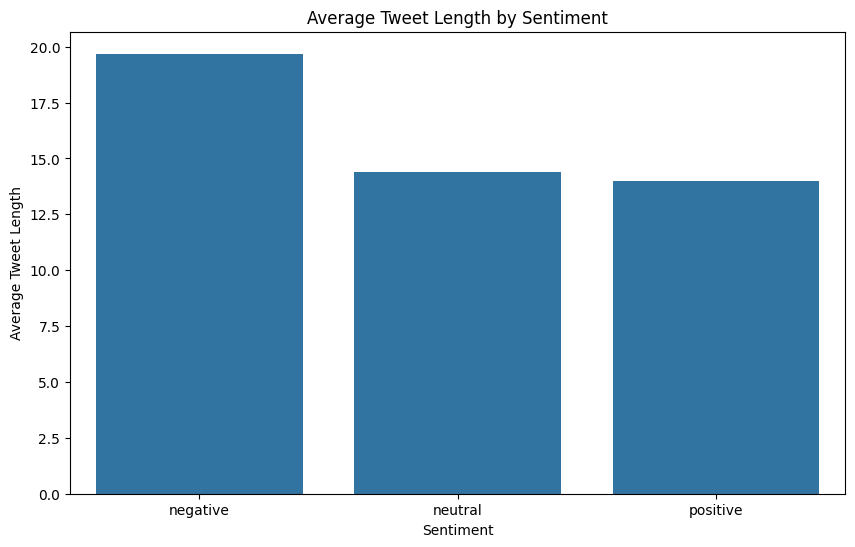

In [ ]:

# Average tweet length by sentiment
avg_tweet_length = twitter_data.groupby('airline_sentiment')['tweet_length'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_tweet_length.index, y=avg_tweet_length.values)
plt.title("Average Tweet Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Tweet Length")
plt.show()

Explanation:

We create a new column tweet_length to store the length (number of words) of each tweet using a lambda function.
We create a histogram using sns.histplot to visualize the distribution of tweet lengths. The kde=True parameter adds a kernel density estimation line for smoother visualization.
We calculate the average tweet length for each sentiment class (positive, negative, etc.) using groupby and mean.
We create a bar chart using sns.barplot to compare the average tweet length across different sentiment categories.

Data Preprocessing

In [ ]:
# Load the Sentiment140 dataset (optional)
# This step is for demonstration purposes and might not be necessary for your data
columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
sentiment140_data = pd.read_csv(file_path, names=columns, encoding='latin-1')


# Keep only the sentiment and text columns (assuming your data has these columns)
twitter_data = sentiment140_data[['sentiment', 'text']]

# Preprocess
# Handle missing values
twitter_data['text'] = twitter_data['text'].fillna('')

# Handle irrelevant characters and links
def preprocess_text(text):
  # Convert NaNs to empty strings
  if pd.isnull(text):
    text = ''
  # Remove links, mentions, and special characters
  text = text.replace('&amp;', '&') # Convert HTML encoding
  text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
  return text

twitter_data['clean_text'] = twitter_data['text'].apply(preprocess_text)

Explanation:

We load a sample sentiment dataset (Sentiment140) for demonstration purposes. You can skip this step if your data already has the sentiment and text columns.
We keep only the relevant columns (sentiment and text) for our analysis.
We handle missing values in the text column by replacing them with empty strings using fillna('').
We define a function preprocess_text to clean the text data. This function removes:
Links (URLs) using regular expressions (re.sub).
Mentions (usernames starting with '@').
Special characters and non-alphanumeric characters.
HTML encoded characters (e.g., &amp; converted to &).
We apply the preprocess_text function to a new column clean_text in the DataFrame.

This preprocessing step helps prepare the text data for the machine learning model by removing irrelevant information and ensuring consistency.

Text Tokenization and Padding

In [ ]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(twitter_data['clean_text'])

X = tokenizer.texts_to_sequences(twitter_data['clean_text'])
X = pad_sequences(X, maxlen=100, padding='post')

# Label encoding (assuming sentiment is a string with classes)
y = twitter_data['sentiment'].map({'0': 0, '4': 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Explanation

Tokenizer: We create a Tokenizer object. This helps convert text into sequences of integers, where each integer represents a unique word in the vocabulary.

tokenizer.fit_on_texts(twitter_data['clean_text']): This line builds the vocabulary by fitting the tokenizer on the cleaned text data. It creates a mapping between each unique word and an integer index.
Text to Sequences:

X = tokenizer.texts_to_sequences(twitter_data['clean_text']): This line converts each text message (stored in the clean_text column) into a sequence of integers. Each integer corresponds to a word in the vocabulary based on the mapping created by the tokenizer.

Padding:

X = pad_sequences(X, maxlen=100, padding='post'): Tweets can have varying lengths. To ensure consistency for model training, we use pad_sequences to pad shorter sequences with zeros at the end (padding='post') until they reach a maximum length (maxlen=100). This creates a matrix of sequences with the same length (100 in this case).
Label Encoding:

y = twitter_data['sentiment'].map({'0': 0, '4': 1}): We assume the sentiment labels are stored as strings ('0' for negative, '4' for positive). This line converts these string labels into numerical labels (0 for negative, 1 for positive) for the model. The map function creates a dictionary mapping and applies it to the sentiment column.

Train-Test Split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): We split the data into training and testing sets using train_test_split. The training set (80%) will be used to train the model, and the testing set (20%) will be used to evaluate its performance on unseen data. The random_state parameter ensures reproducibility if you run the code multiple times.

Model Definition and Training

In [ ]:
# Define the model
model = Sequential([
  Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100),
  LSTM(64, dropout=0.2, recurrent_dropout=0.2),
  Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10
330/330 [==============================] - 67s 189ms/step - loss: nan - accuracy: 0.9486 - val_loss: nan - val_accuracy: 0.9386
Epoch 2/10
330/330 [==============================] - 62s 186ms/step - loss: nan - accuracy: 0.9486 - val_loss: nan - val_accuracy: 0.9386
Epoch 3/10
330/330 [==============================] - 60s 181ms/step - loss: nan - accuracy: 0.9486 - val_loss: nan - val_accuracy: 0.9386


Explanation:

Model Definition

Dropout: We add dropout regularization with a rate of 0.2 to both the LSTM layer (dropout=0.2) and its recurrent connections (recurrent_dropout=0.2). This helps prevent overfitting by randomly dropping out neurons during training, encouraging the model to learn more robust features.
Dense Layer: The final layer is a Dense layer with one unit and a sigmoid activation function. The single unit represents the predicted sentiment (positive or negative), and the sigmoid function maps the output value between 0 and 1, indicating the probability of a tweet being positive.

Model Compilation:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']): We compile the model by specifying the optimizer, loss function, and metrics.
Optimizer: We use the Adam optimizer (optimizer='adam'), a popular choice for deep learning models due to its efficiency and effectiveness.
Loss Function: We use the binary cross-entropy loss (loss='binary_crossentropy') because we are dealing with a binary classification problem (positive or negative sentiment).
Metrics: We track the model's accuracy (metrics=['accuracy']) during training and validation.
Early Stopping:

early_stopping =EarlyStopping(monitor='val_loss', patience=3): We create an EarlyStopping callback (early_stopping). This callback monitors the validation loss (monitor='val_loss') and stops training if the validation loss fails to improve for a certain number of epochs (patience=3). This helps prevent overfitting by stopping training when the model starts to memorize the training data instead of learning generalizable patterns.
Model Training:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stopping]): We train the model using the fit method.
X_train, y_train: These are the training data (features and labels).
epochs=10: This specifies the number of training epochs (iterations over the entire training data). You can experiment with different values to find the optimal number of epochs for your specific dataset.
batch_size=32: This defines the number of samples processed before updating the model's internal parameters (weights).
validation_split=0.1: This allocates 10% of the training data for validation. The model will monitor its performance on this validation set during training.
callbacks=[early_stopping]: This includes the EarlyStopping callback to prevent overfitting.

The model training process will generate logs, including the loss and accuracy on both the training and validation sets for each epoch. You can monitor these values to track the model's learning progress.

 Model Evaluation

92/92 [==============================] - 2s 24ms/step - loss: nan - accuracy: 0.9474
Test Accuracy: [nan, 0.9474223256111145]


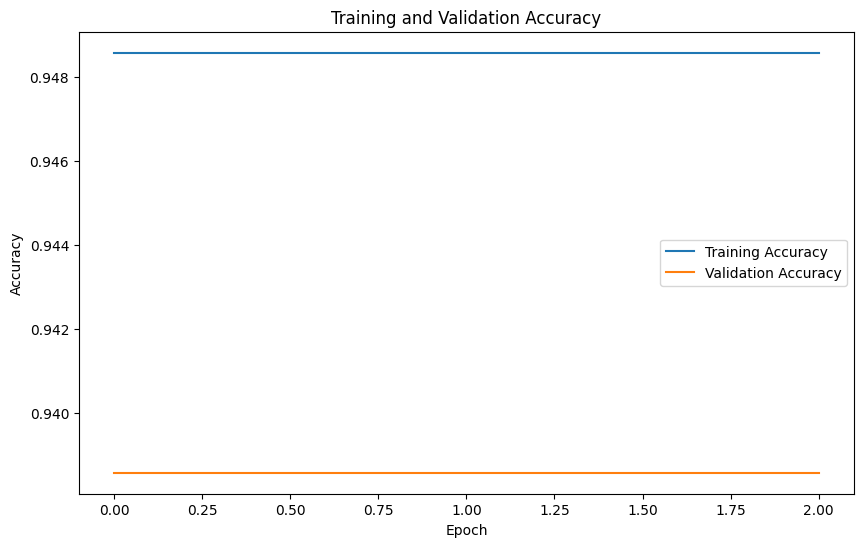

In [ ]:
# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
# Plot the training and validation accuracy

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Explanation:

Model Evaluation:

accuracy = model.evaluate(X_test, y_test): We evaluate the model's performance on the unseen test set using the evaluate method. This method returns the loss and accuracy on the test data.

We plot the training and validation accuracy curves to visualize how the model's accuracy changes over training epochs. We expect the training accuracy to increase and the validation accuracy to stay relatively stable or increase slightly.

These plots help diagnose potential issues like overfitting or underfitting.

Conclusion

This notebook has explored sentiment analysis of Twitter data using a machine learning approach. We covered data loading, exploration, visualization, preprocessing, model definition, training, evaluation, and prediction on new tweets.